In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0


In [4]:
df.tail(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.8181,144.89351,Western Metropolitan,6543.0


In [5]:
df.shape

(34857, 21)

In [6]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
checkNull = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']

for col in checkNull:
    Nullcounts=df[col].isna().sum()
    percent=(Nullcounts/len(df[col]))*100
    print('Null values for {}'.format(col) + ' is: {}'.format(Nullcounts) + "  Percentage: {:.1f}%".format(percent))

Null values for Suburb is: 0  Percentage: 0.0%
Null values for Address is: 0  Percentage: 0.0%
Null values for Rooms is: 0  Percentage: 0.0%
Null values for Type is: 0  Percentage: 0.0%
Null values for Price is: 7610  Percentage: 21.8%
Null values for Method is: 0  Percentage: 0.0%
Null values for SellerG is: 0  Percentage: 0.0%
Null values for Date is: 0  Percentage: 0.0%
Null values for Distance is: 1  Percentage: 0.0%
Null values for Postcode is: 1  Percentage: 0.0%
Null values for Bedroom2 is: 8217  Percentage: 23.6%
Null values for Bathroom is: 8226  Percentage: 23.6%
Null values for Car is: 8728  Percentage: 25.0%
Null values for Landsize is: 11810  Percentage: 33.9%
Null values for BuildingArea is: 21115  Percentage: 60.6%
Null values for YearBuilt is: 19306  Percentage: 55.4%
Null values for CouncilArea is: 3  Percentage: 0.0%
Null values for Lattitude is: 7976  Percentage: 22.9%
Null values for Longtitude is: 7976  Percentage: 22.9%
Null values for Regionname is: 3  Percentage

'YearBuilt' and 'BuildingArea' missing value are more than 50%. 

In [9]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [10]:
numerical_features =['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom', 'Car','Landsize', \
                       'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

categorical_features = ['Suburb','Type', 'Method','CouncilArea','Regionname',\
                            'Date','Address', 'SellerG']

In [11]:
df[categorical_features].nunique()

Suburb           351
Type               3
Method             9
CouncilArea       33
Regionname         8
Date              78
Address        34009
SellerG          388
dtype: int64

In [12]:
# exclude 'Address' in categorical features visulization as it is text string and could be represented by 'Lattitude' and 'Longtitude', and 'Postcode' 
categorical_features = ['Suburb','Type', 'Method','CouncilArea','Regionname','Date','SellerG']

In [13]:
df[numerical_features].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Visualize numeriacal features via boxplot and histogram.

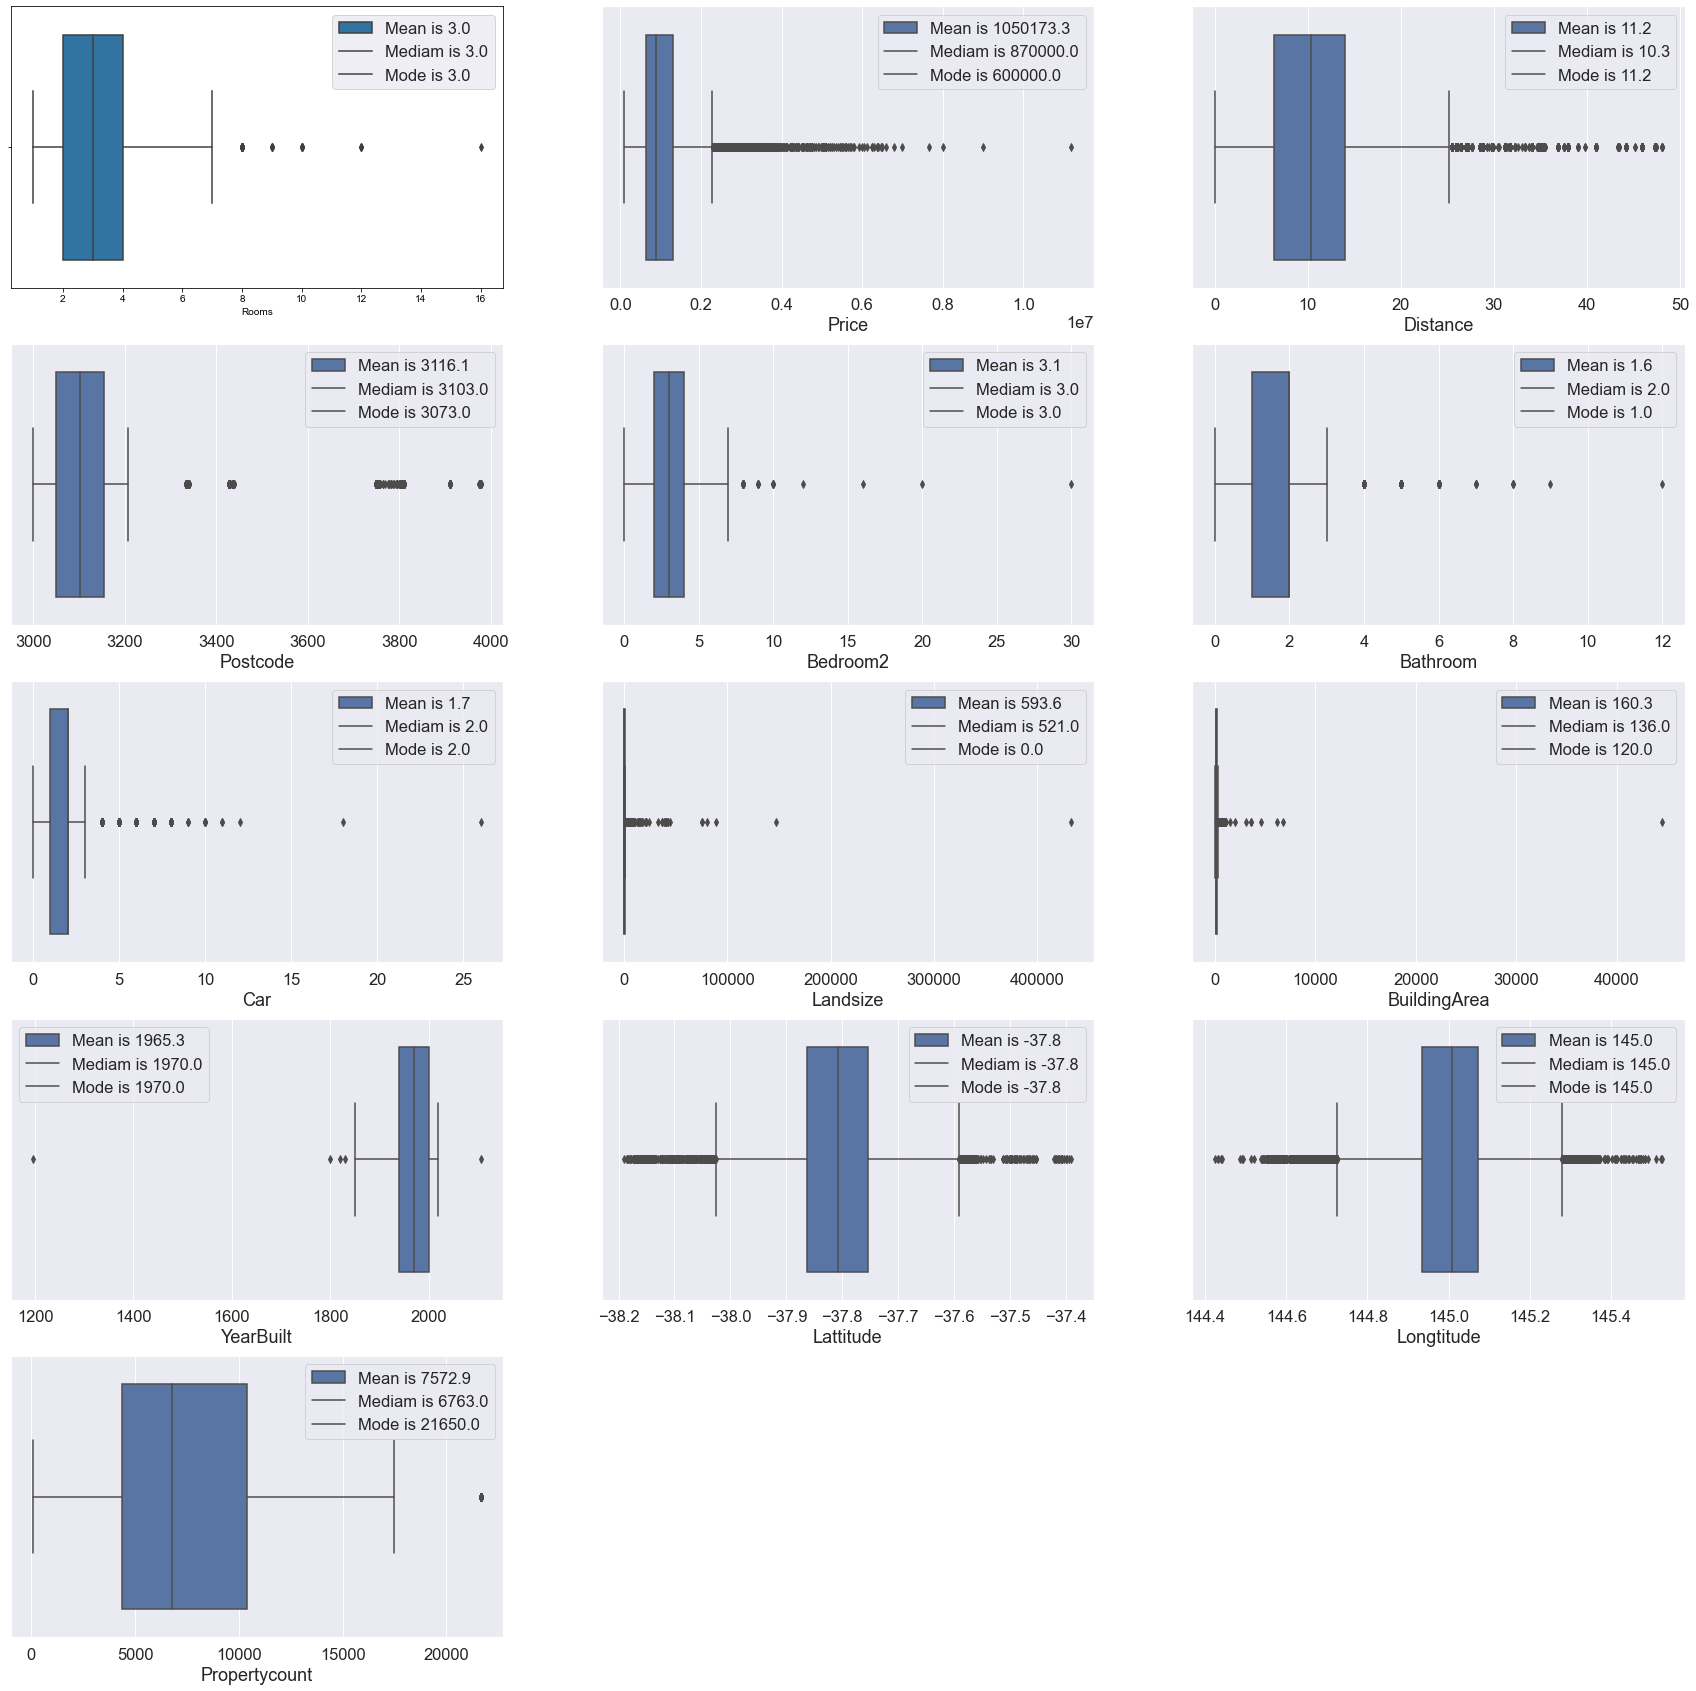

In [14]:
plt.figure(figsize=(30,30))
i=1

for col in numerical_features:
    plt.subplot(5,3,i)
    i = i + 1
    ax = sns.boxplot(df[col])
    sns.set(font_scale = 1.5)
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    ax.legend(["Mean is {:.1f}".format(mean) , "Mediam is {:.1f}".format(median), "Mode is {:.1f}".format(mode)])

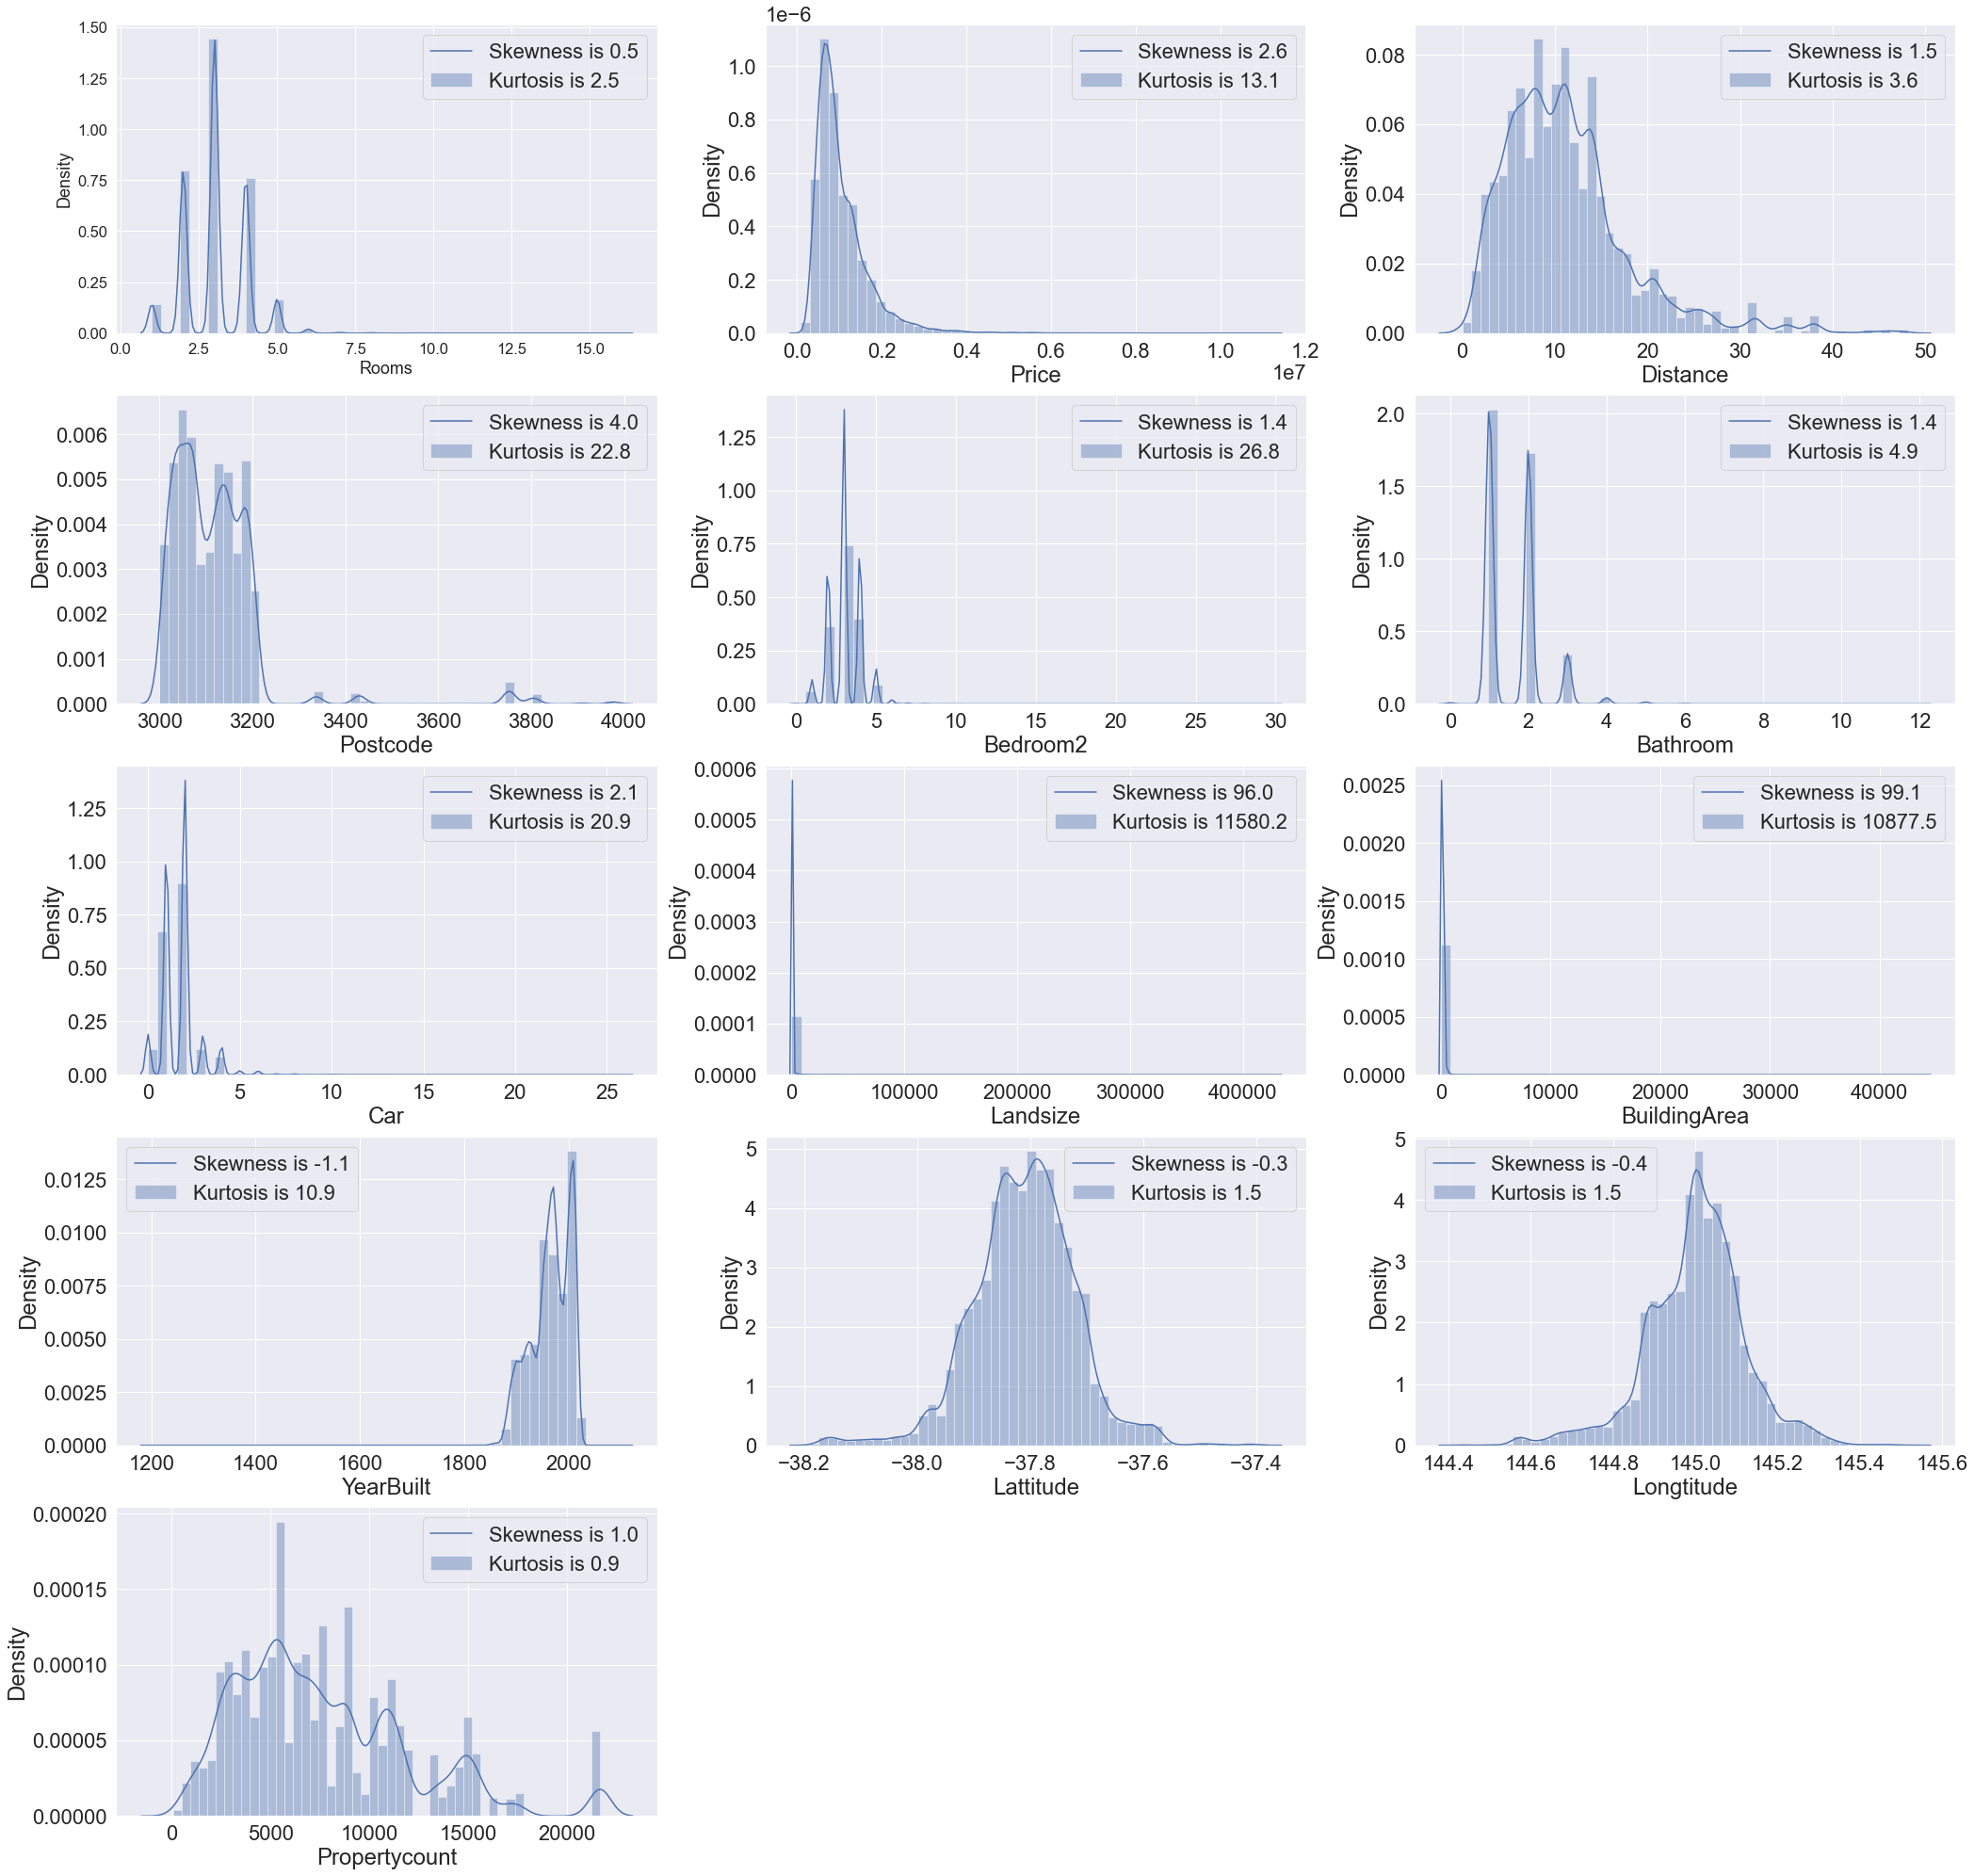

In [15]:
i = 1
plt.figure(figsize=(35,35))
for col in numerical_features:
    plt.subplot(5,3,i)
    i = i + 1
    ax = sns.distplot(df[col])
    sns.set(font_scale = 2)
    skew=df[col].skew()
    kurt=df[col].kurt()
    ax.set_xlabel(col)
    plt.legend(["Skewness is {:.1f}".format(skew) , "Kurtosis is {:.1f}".format(kurt)])

Visualize numerical and categorical features against price

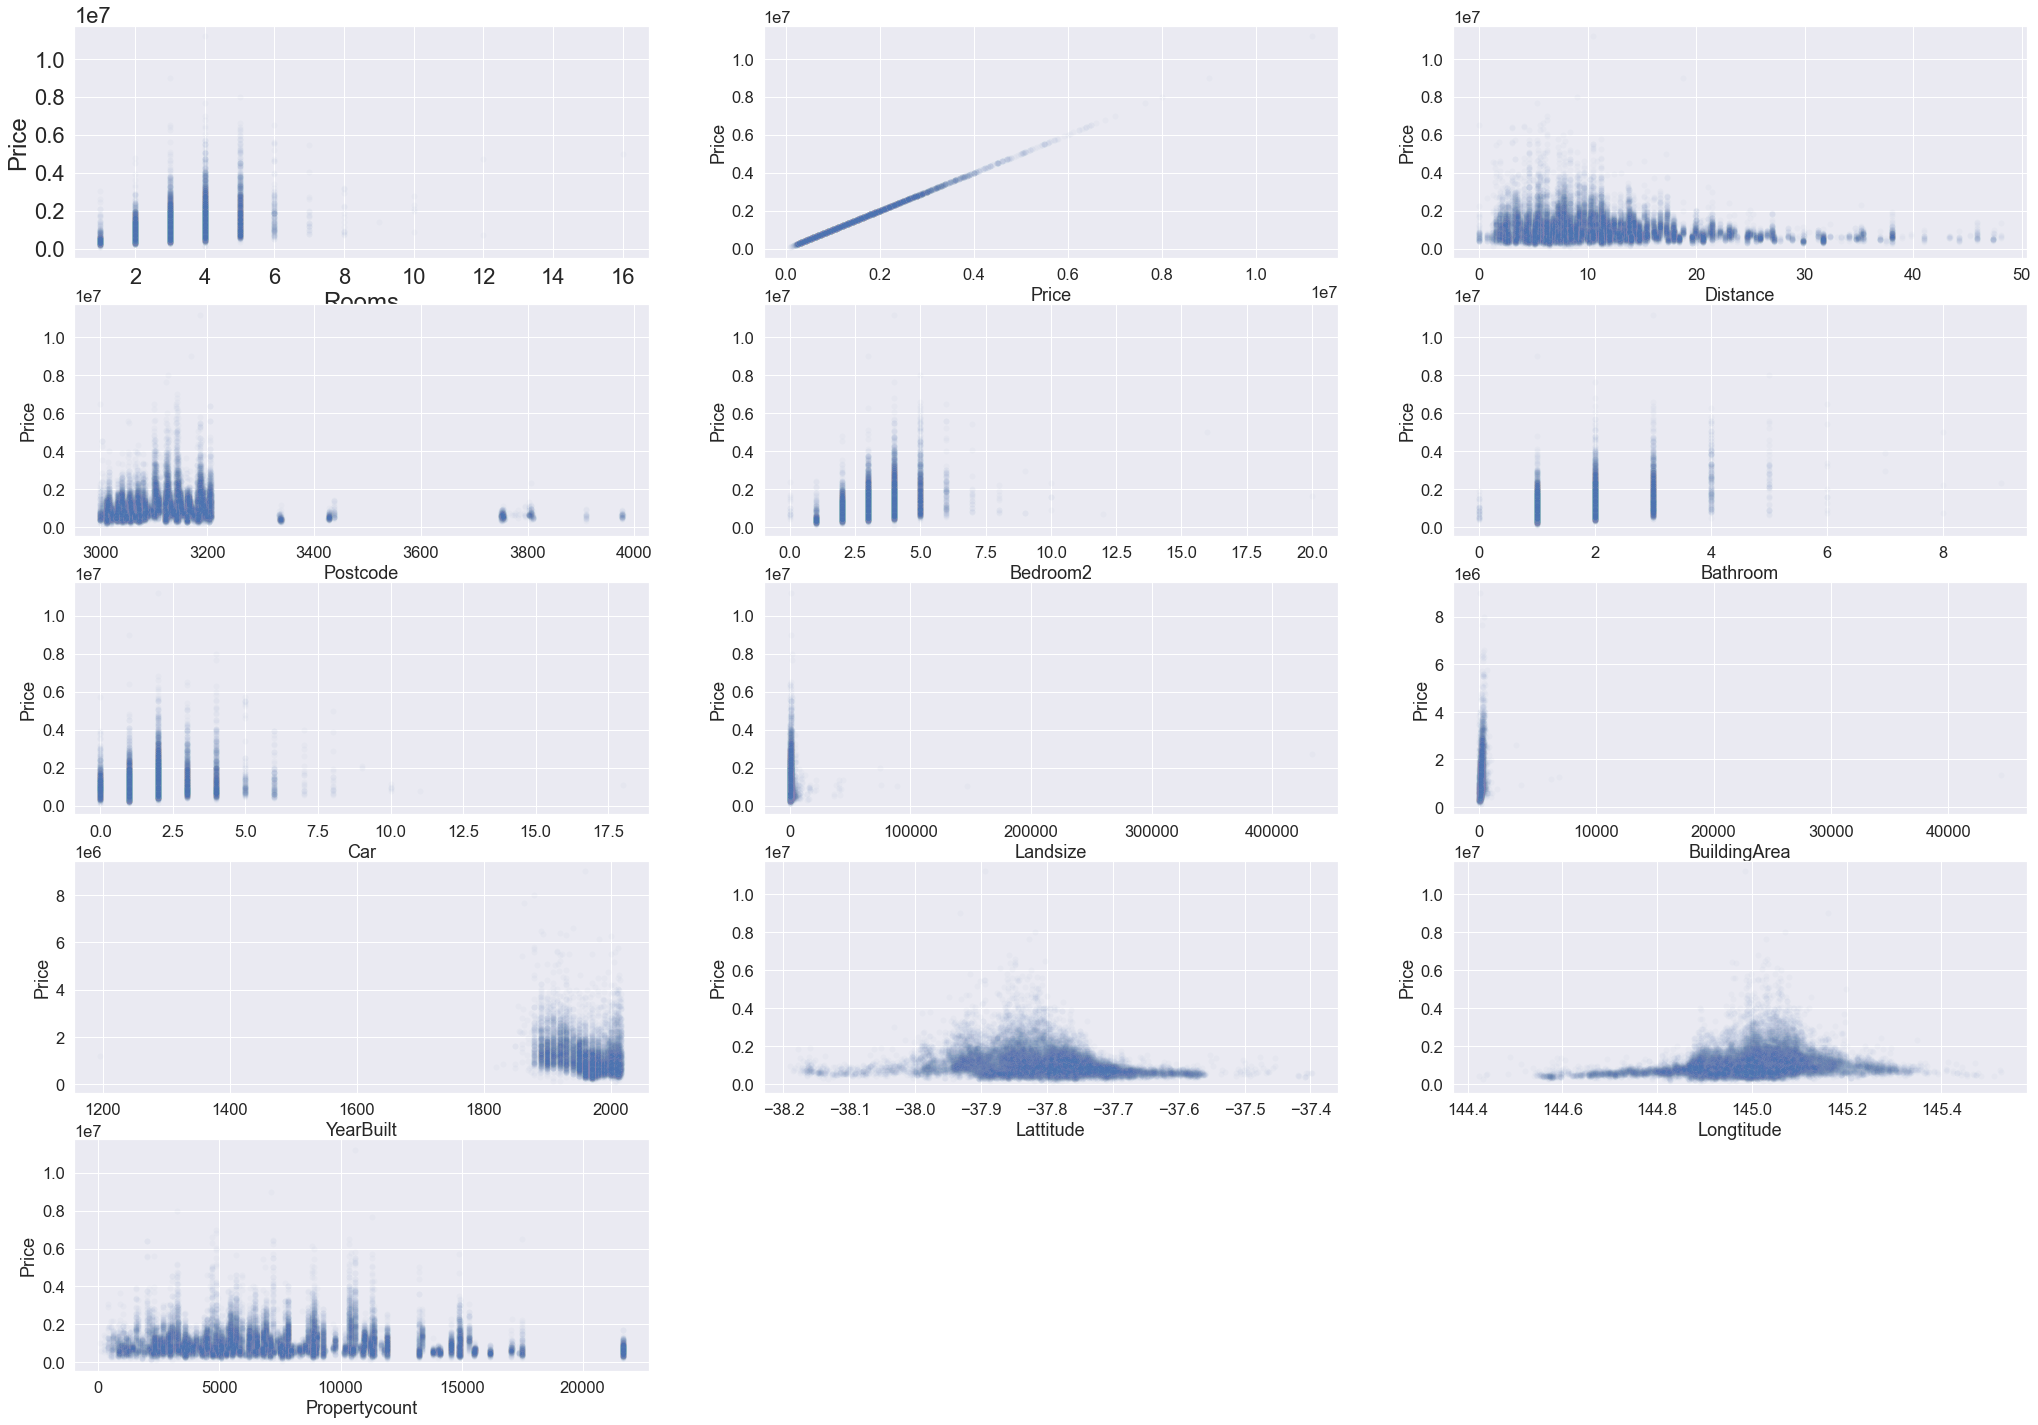

In [16]:
i = 1
plt.figure(figsize =(35, 35))
for col in numerical_features:
    plt.subplot(7,3,i)
    i = i + 1
    sns.scatterplot(data=df, x=col, y='Price',alpha=0.03)
    sns.set(font_scale = 1.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

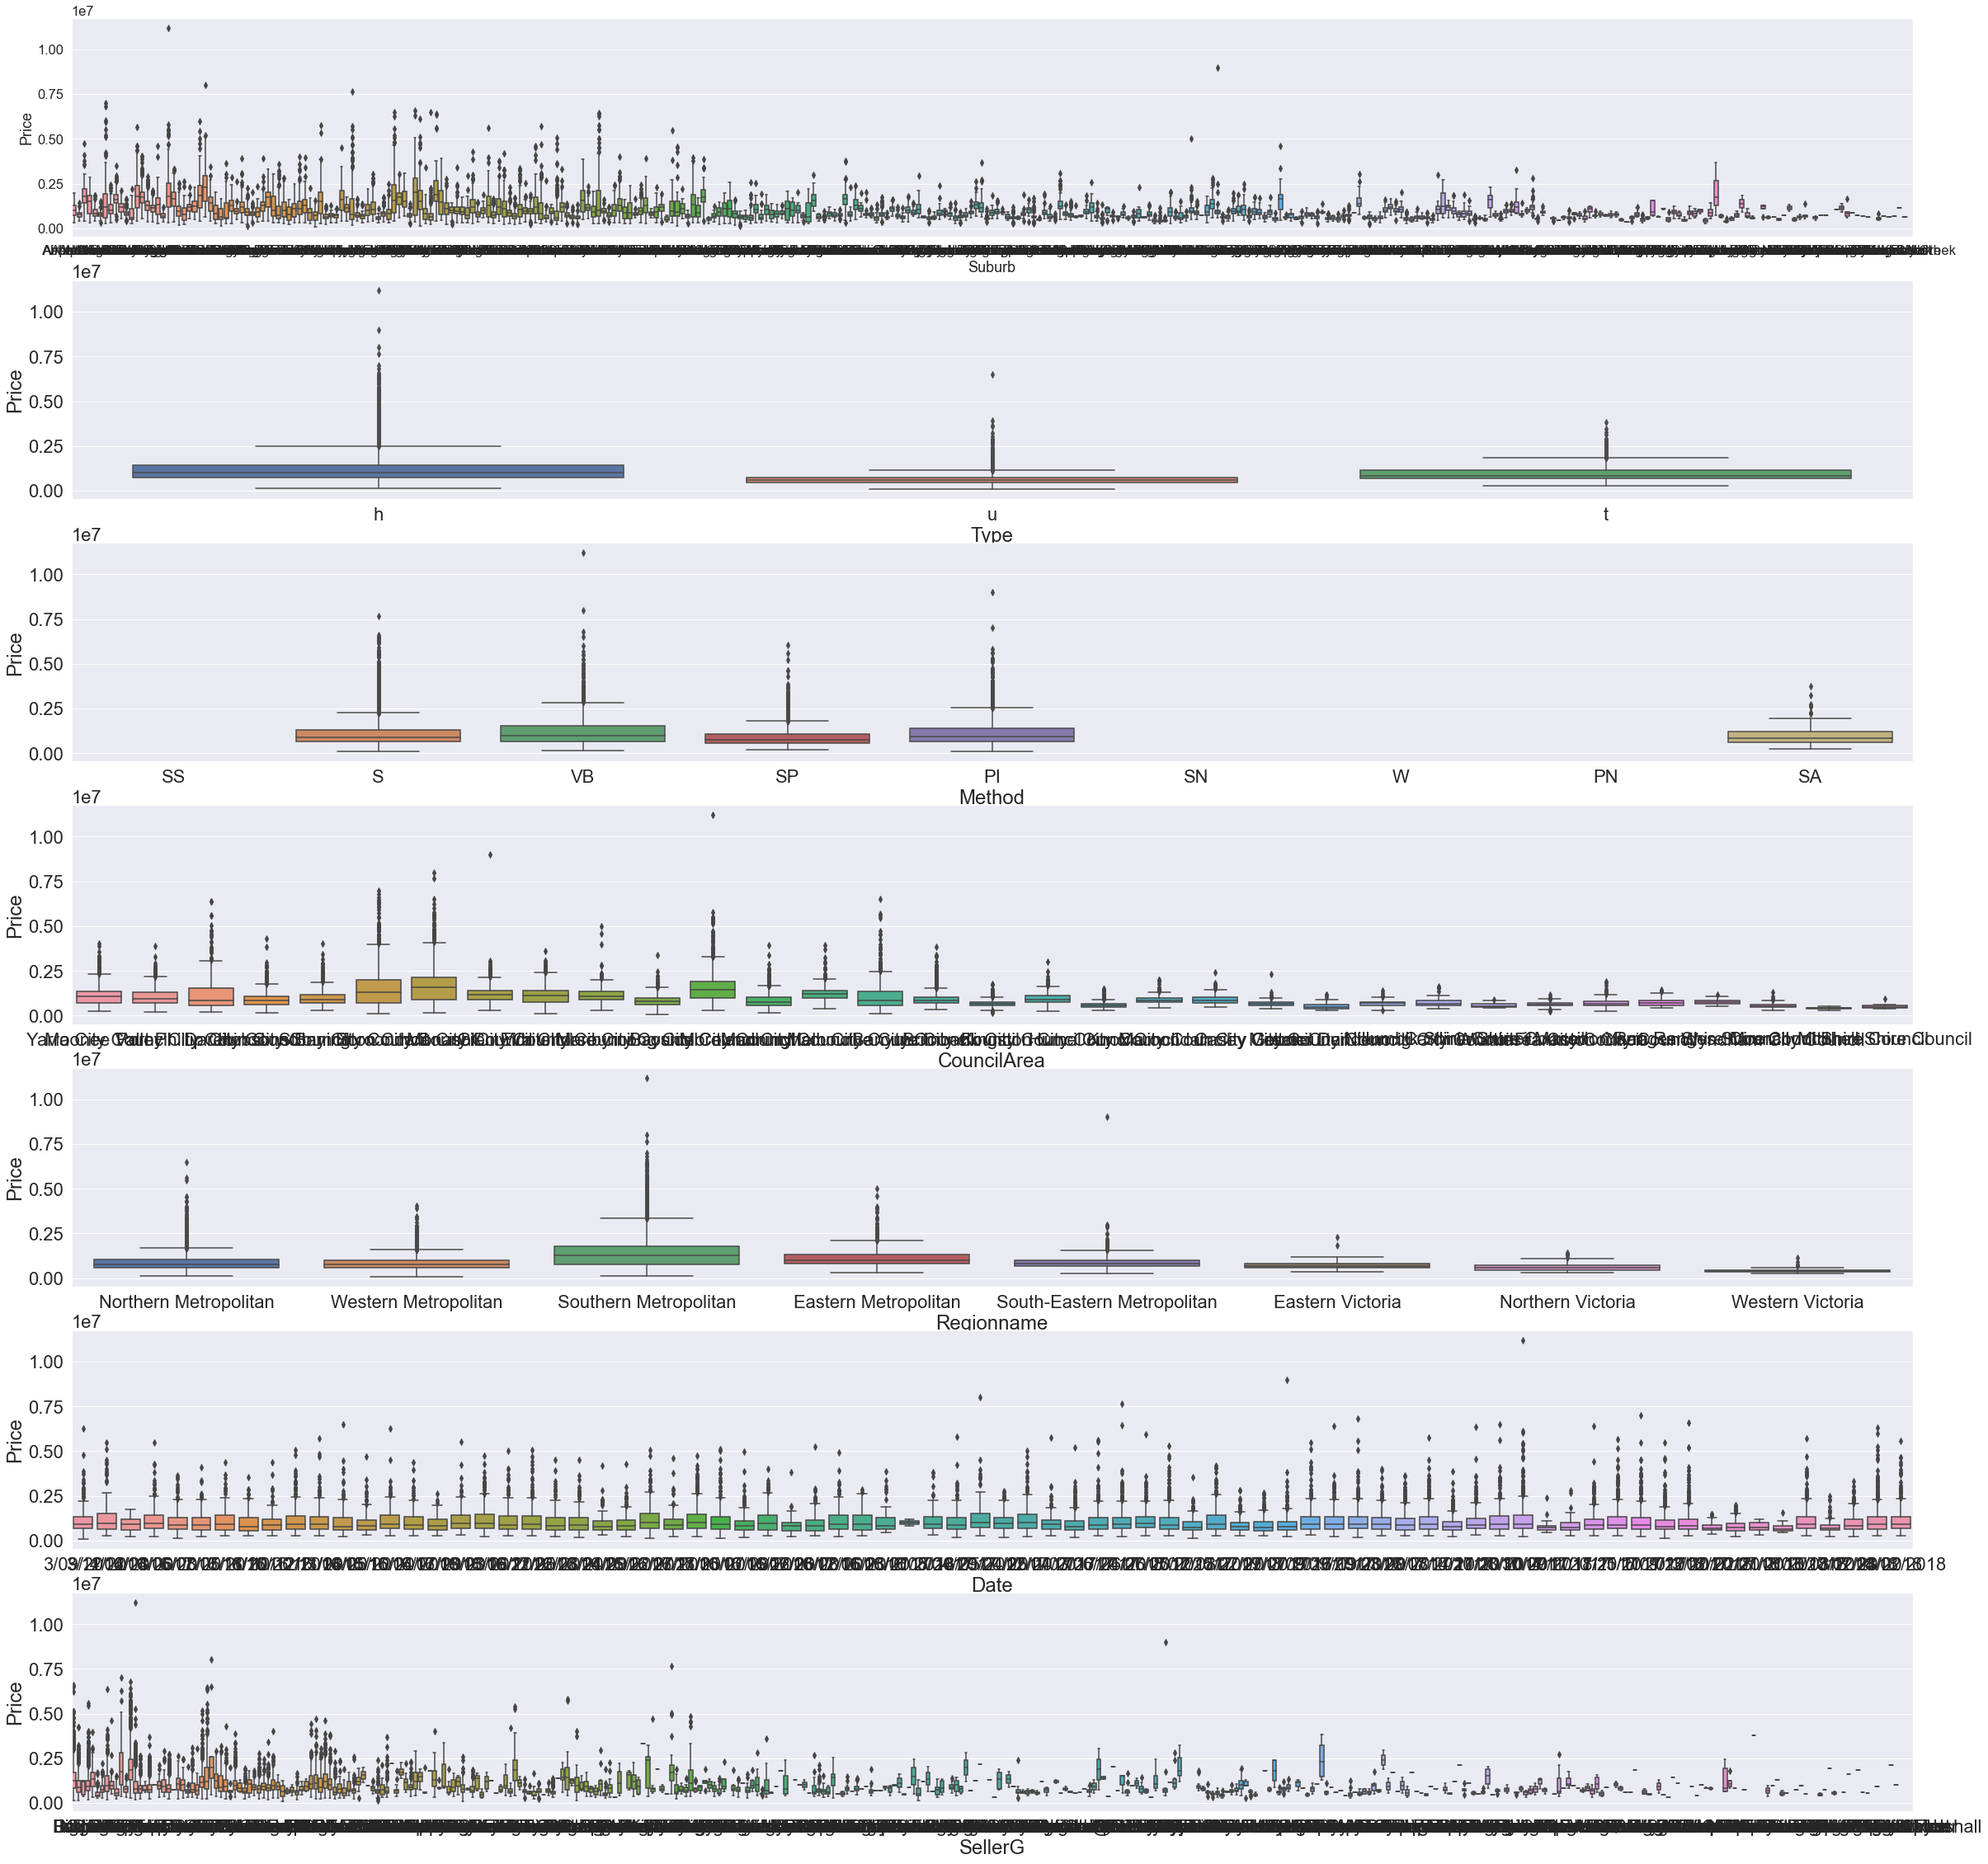

In [17]:
i = 1
plt.figure(figsize =(40, 40))
for col in categorical_features:
    plt.subplot(7,1,i)
    i = i + 1
    sns.boxplot(data=df, x=col, y='Price')
    sns.set(font_scale = 2)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

## Data Processing


### Removing columns

In [18]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Coumns to be removed: 

1). 'Address', 'Postcode', 'Suburb', 'Regionname','CouncilArea': they are all location point(s) and discrete in nature. Location points could be better expressed by continuous data such as 'Lattitude','Longtitude' in this case

2). 'BuildingArea', 'YearBuilt' : missing value more than 50%. it is difficult to impute missing value with acceptable accuracy

3). 'Type', 'Method', 'Date': these features have little variance to price in the above boxplots.  

In [19]:
df1 = df.drop(['Address', 'Postcode', 'Suburb', 'Regionname','CouncilArea', \
              'BuildingArea', 'YearBuilt', 'Type', 'Method', 'Date'], axis=1)

### Removing outliers and extreme values

In [20]:
df1.describe(percentiles=[.05,.25, .5, .75, .90, .95, .99, .995])

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
5%,2.000000,4.150000e+05,2.700000,2.000000,1.000000,0.000000,0.000000,-37.948500,144.800080,2185.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,-37.754100,145.071900,10412.000000
90%,4.000000,1.800000e+06,19.900000,4.000000,2.000000,3.000000,824.000000,-37.706800,145.136680,14577.000000
95%,5.000000,2.250000e+06,24.700000,5.000000,3.000000,4.000000,1001.000000,-37.675190,145.187700,15510.000000


The building Landsize should be of reasonable size. A building landsize of 0 square meters is not reasonable. We will remove it

In [21]:
df1 = df1.drop(df1[df1['Landsize']==0].index, axis=0)

The 0.5% of extreme values in columns 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize' do not sound reasonable. This project will exclude these data points. Besides, dropping these data points will cause little information loss

In [22]:
extremes = ['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize']
for col in extremes: 
    df1.drop(df1[df[col]>df[col].quantile(0.995)].index, inplace=True)

In [23]:
df1.describe(percentiles=[.001,.25, .5, .75, .90, .95, .99])

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,32093.000000,2.507900e+04,32092.000000,23888.000000,23879.000000,23389.000000,20321.000000,24129.000000,24129.000000,32090.000000
mean,3.094756,1.076381e+06,11.537349,3.177997,1.643411,1.768139,552.975395,-37.809060,145.002994,7521.732689
std,0.905804,6.381799e+05,6.789836,0.873244,0.686359,0.955474,400.584603,0.092995,0.124417,4446.309830
min,1.000000,1.120000e+05,0.000000,0.000000,0.000000,0.000000,1.000000,-38.190430,144.423790,121.000000
0.1%,1.000000,2.452730e+05,0.000000,1.000000,1.000000,0.000000,36.000000,-38.165775,144.554864,394.000000
25%,3.000000,6.600000e+05,6.800000,3.000000,1.000000,1.000000,304.000000,-37.864190,144.929320,4294.000000
50%,3.000000,9.000000e+05,10.500000,3.000000,2.000000,2.000000,554.000000,-37.803350,145.011250,6567.000000
75%,4.000000,1.311000e+06,14.200000,4.000000,2.000000,2.000000,687.000000,-37.749100,145.077700,10331.000000
90%,4.000000,1.820000e+06,20.400000,4.000000,2.000000,3.000000,836.000000,-37.703218,145.143622,14092.000000
95%,5.000000,2.255300e+06,24.745000,5.000000,3.000000,4.000000,1000.000000,-37.671172,145.194816,15510.000000


### Fill the missing values

In [24]:
df1.isna().sum()

Rooms                0
Price             7014
SellerG              0
Distance             1
Bedroom2          8205
Bathroom          8214
Car               8704
Landsize         11772
Lattitude         7964
Longtitude        7964
Propertycount        3
dtype: int64

As mean value is sensitive to extreme values. Hence we will use median value to impute the numerical colums as there are many extreme values for most features.

In [25]:
missing_cols = ['Price','Distance','Bedroom2','Bathroom', 'Car','Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
for col in missing_cols:
    if col != 'Price':
        df1[col].fillna((df1[col].median()), inplace = True)

price is our dependent variable, imputing price may increase bias in the data. hence its missing value will be deleted.

In [26]:
df1 = df1.drop(df1[df['Price'].isna()].index, axis=0)

In [27]:
df1.isna().sum()

Rooms            0
Price            0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

### Check and drop duplicates

In [28]:
df1.duplicated().sum()

90

In [29]:
df1.drop_duplicates(keep='first', inplace=True)

In [30]:
df1.duplicated().sum()

0

### transfer 'Price' to normal distribution 

Linear Regression assumes variables normal distribution. Hence we will transform variables highly skewed

In [31]:
df1.Price.skew()

2.54455881979412

In [32]:
df1.Price.kurt()

12.815139644390754

Transfer 'Price' normal distribution

In [33]:
df1['log_price'] = np.log(df1['Price'])

## Final dataset description

In [34]:
df1.tail(2)

,Rooms,Price,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,log_price
34855,3,1140000.0,hockingstuart,6.3,3.0,2.0,2.0,554.0,-37.80335,145.01125,6543.0,13.946539
34856,2,1020000.0,RW,6.3,2.0,1.0,0.0,250.0,-37.81810,144.89351,6543.0,13.835313


In [35]:
df1.shape

(24989, 12)

In [36]:
df1.dtypes

Rooms              int64
Price            float64
SellerG           object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
log_price        float64
dtype: object

In [37]:
df1.columns

Index(['Rooms', 'Price', 'SellerG', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'log_price'],
      dtype='object')

In [38]:
df1.isna().sum()

Rooms            0
Price            0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
log_price        0
dtype: int64

In [39]:
df1.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,log_price
count,24989.000000,2.498900e+04,24989.000000,24989.000000,24989.000000,24989.000000,24989.000000,24989.000000,24989.000000,24989.000000,24989.000000
mean,3.059906,1.077189e+06,11.654392,3.106487,1.711913,1.823562,549.669335,-37.804678,145.000947,7509.461363,13.755533
std,0.895119,6.386702e+05,6.792150,0.747057,0.604366,0.822611,316.481012,0.081948,0.108758,4509.007897,0.503096
min,1.000000,1.120000e+05,0.000000,0.000000,0.000000,0.000000,1.000000,-38.190430,144.423790,121.000000,11.626254
25%,2.000000,6.600000e+05,7.000000,3.000000,1.000000,1.000000,453.000000,-37.840300,144.953800,4217.000000,13.399995
50%,3.000000,9.000000e+05,10.700000,3.000000,2.000000,2.000000,554.000000,-37.803350,145.011250,6543.000000,13.710150
75%,4.000000,1.315000e+06,14.300000,3.000000,2.000000,2.000000,603.000000,-37.763000,145.051700,10331.000000,14.089347
max,6.000000,1.120000e+07,48.100000,6.000000,4.000000,6.000000,4679.000000,-37.397800,145.526350,21650.000000,16.231424


In [40]:
df1['SellerG'].nunique()

337

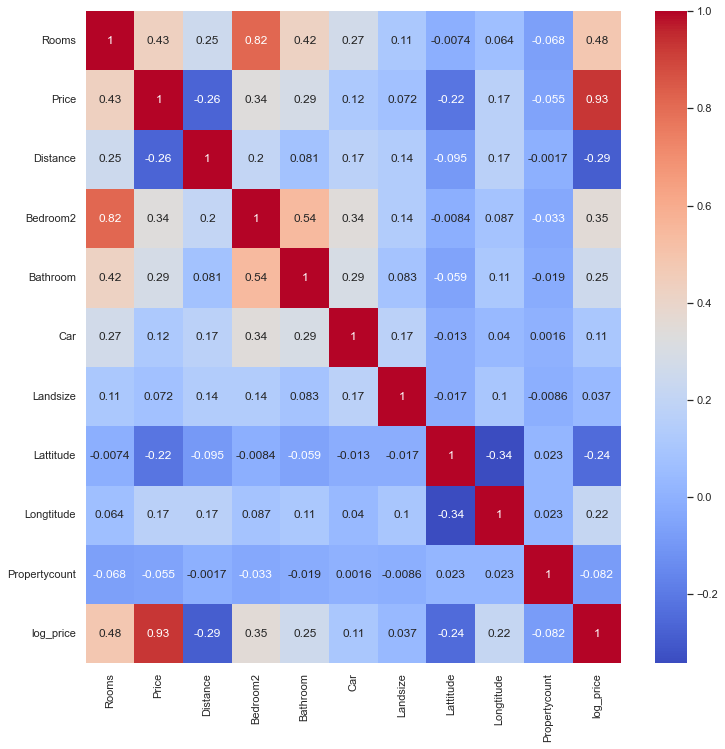

In [41]:
figure=plt.figure(figsize=[12,12])
sns.set(font_scale=1)
corr=df1.corr()
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

## Final data visualization

In [42]:
df1.columns

Index(['Rooms', 'Price', 'SellerG', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'log_price'],
      dtype='object')

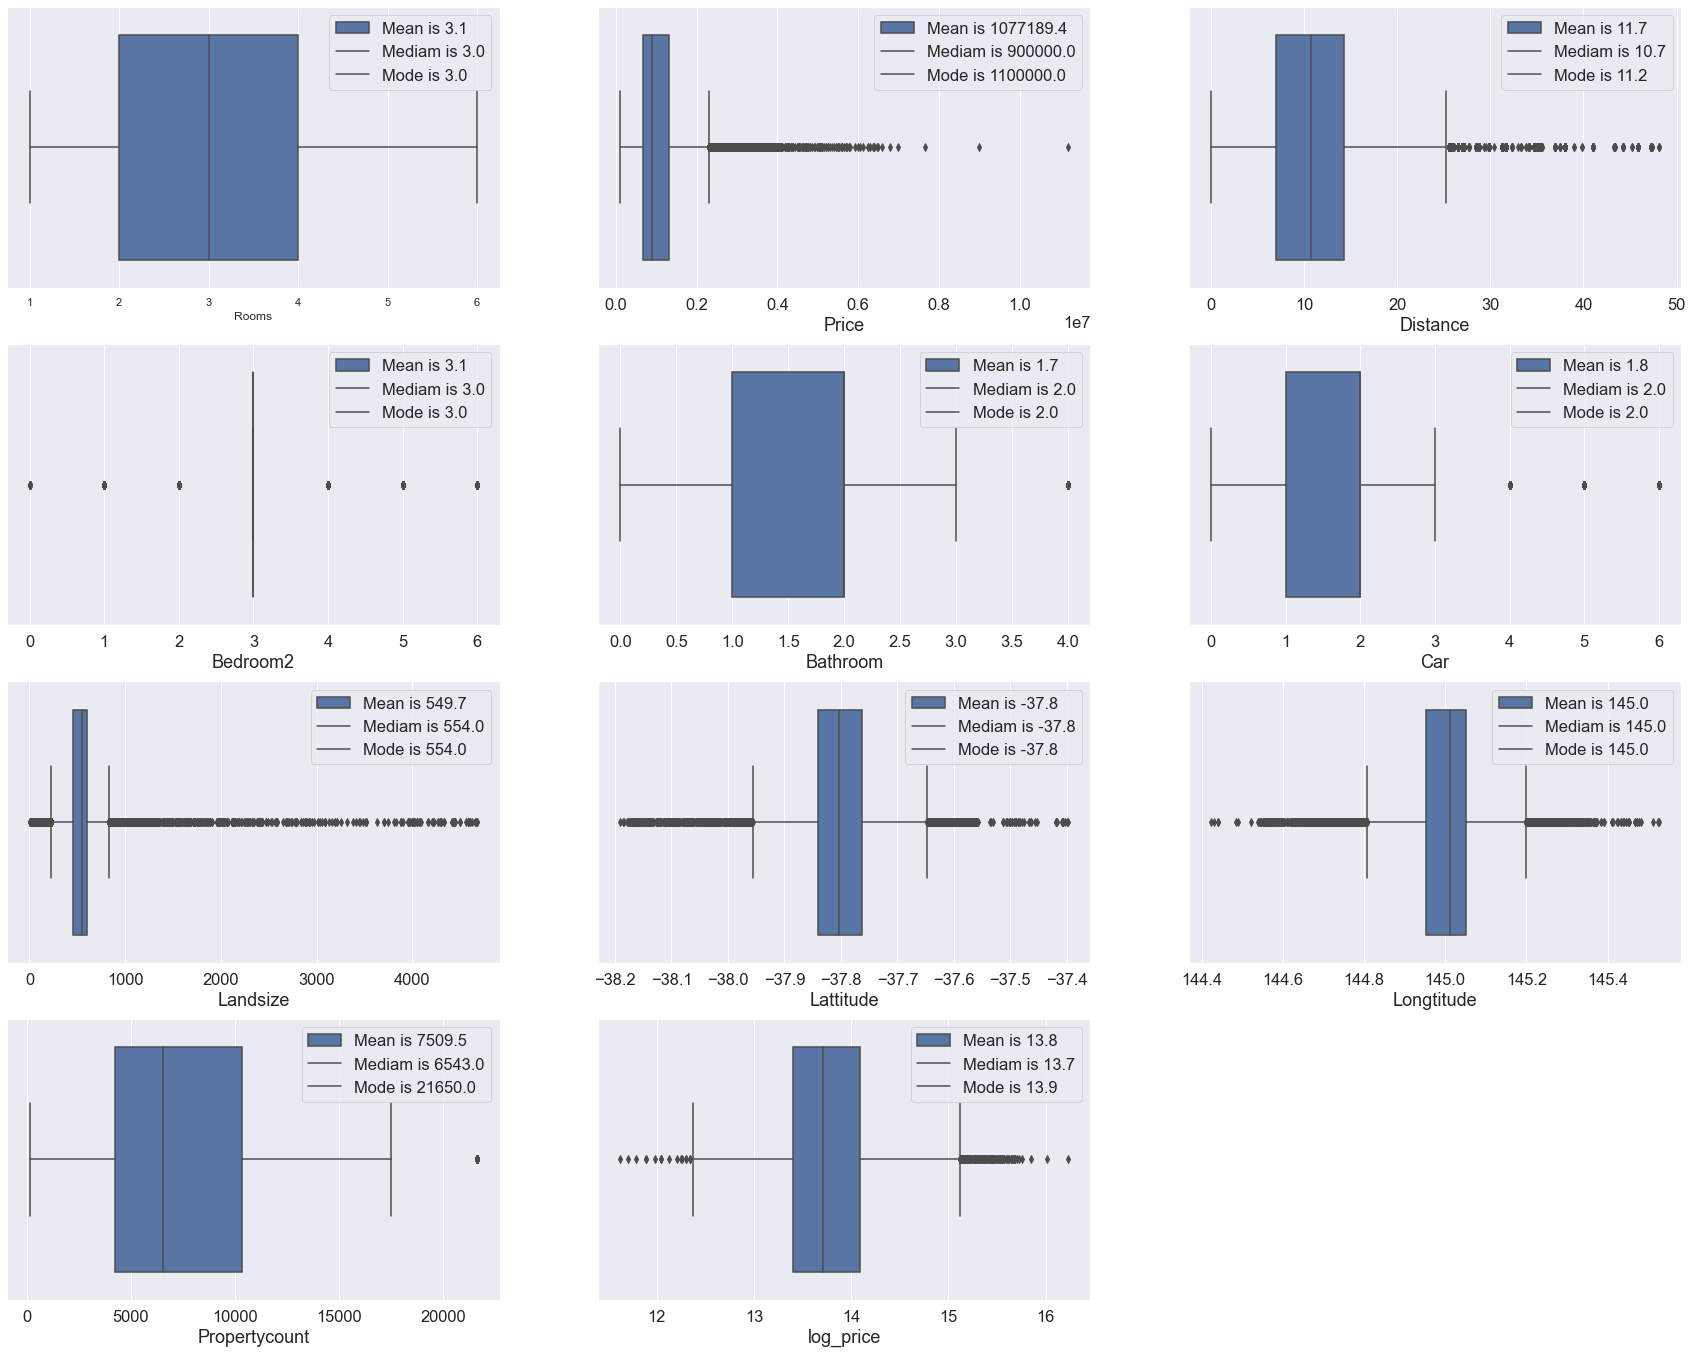

In [43]:
numerical_features = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car','Landsize', 'Lattitude', \
                      'Longtitude', 'Propertycount', 'log_price']
plt.figure(figsize=(30,30))
i=1

for col in numerical_features:
    plt.subplot(5,3,i)
    i = i + 1
    ax = sns.boxplot(df1[col])
    sns.set(font_scale=1.5)
    mean = df1[col].mean()
    median = df1[col].median()
    mode = df1[col].mode()[0]
    ax.legend(["Mean is {:.1f}".format(mean) , "Mediam is {:.1f}".format(median), "Mode is {:.1f}".format(mode)])

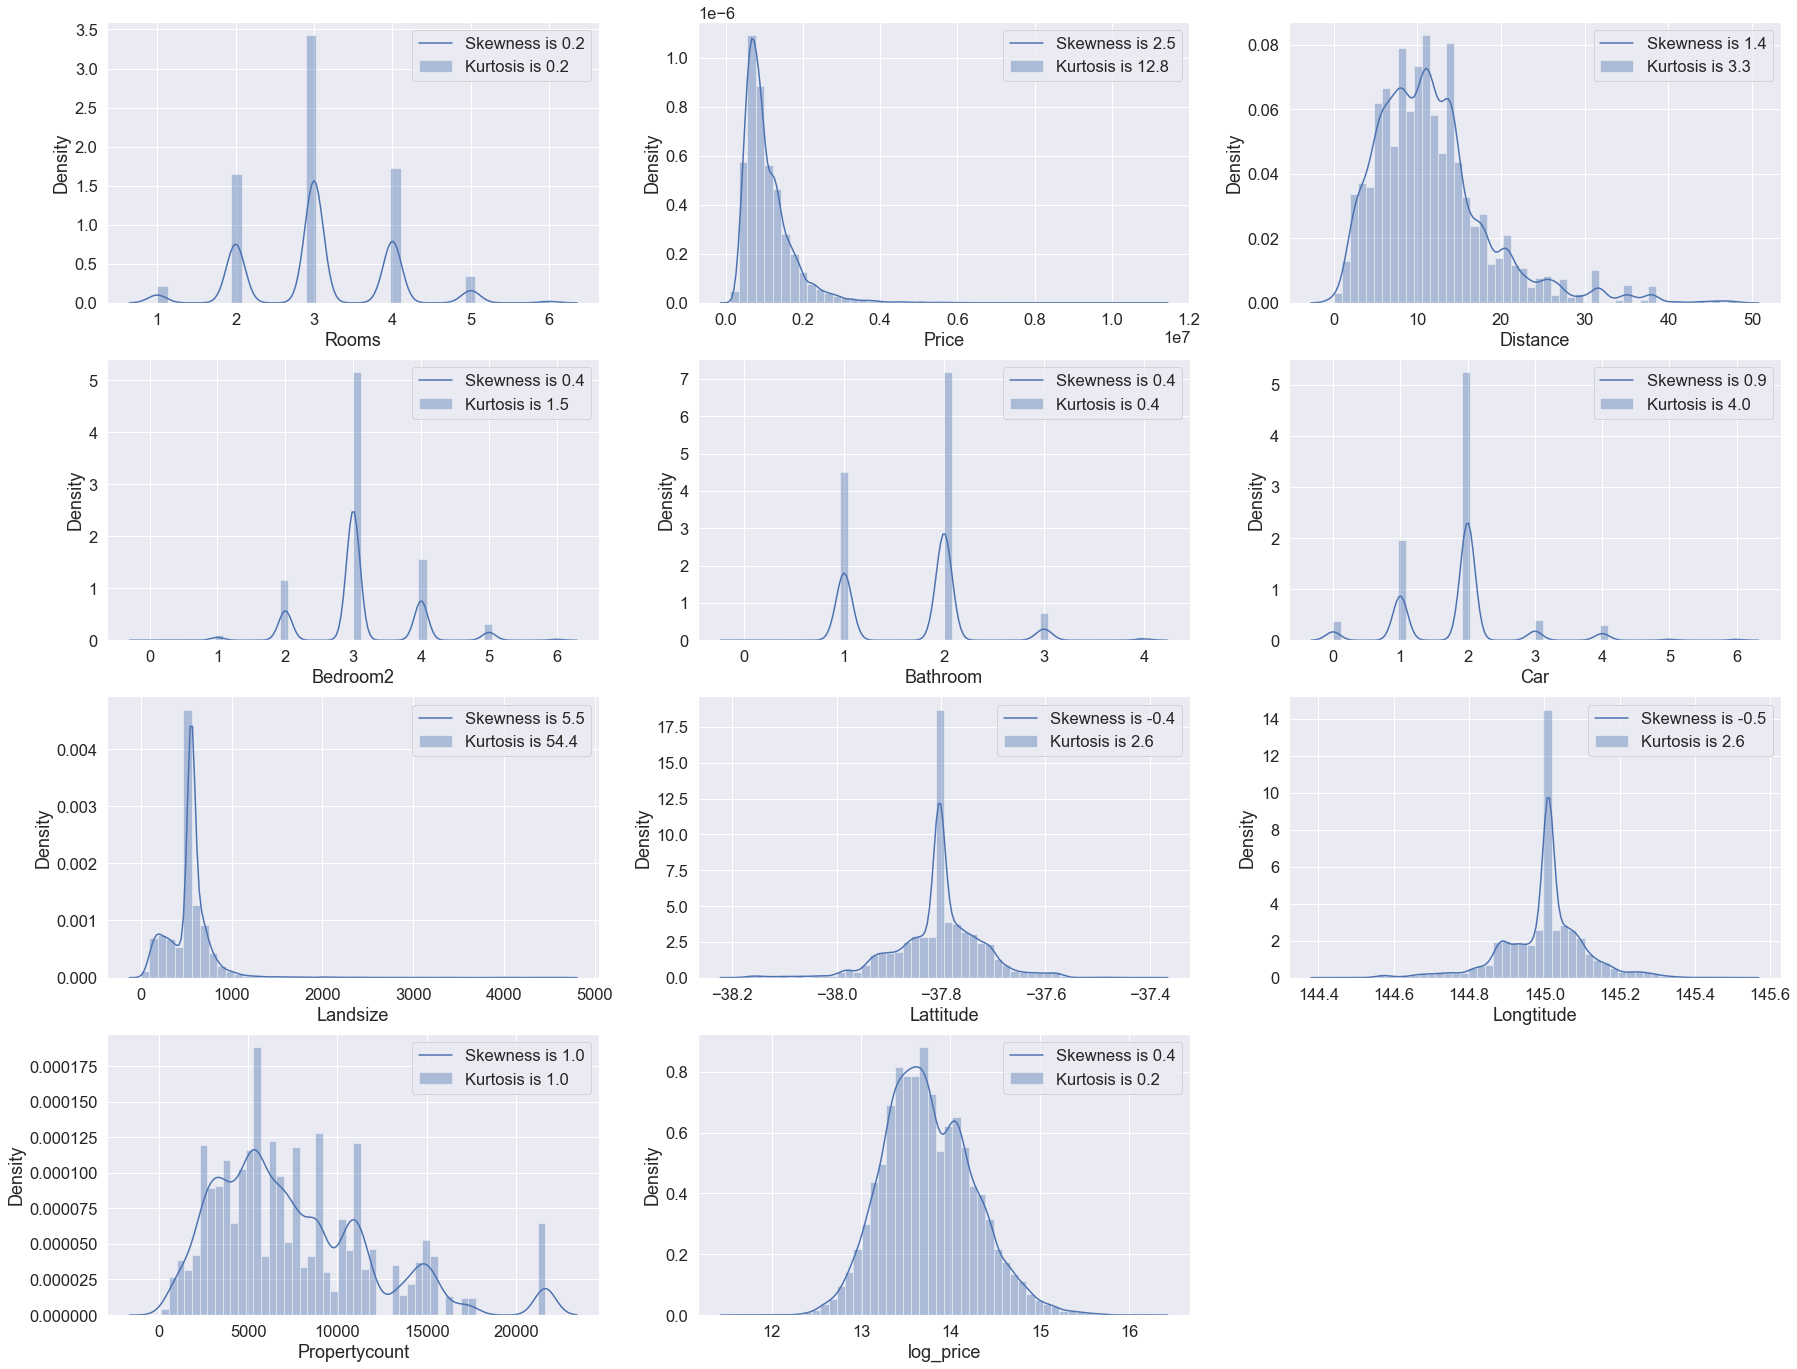

In [44]:
i = 1
plt.figure(figsize=(30,30))
for col in numerical_features:
    plt.subplot(5,3,i)
    i = i + 1
    ax = sns.distplot(df1[col])
    sns.set(font_scale=1.5)
    skew=df1[col].skew()
    kurt=df1[col].kurt()
    ax.set_xlabel(col)
    
    plt.legend(["Skewness is {:.1f}".format(skew) , "Kurtosis is {:.1f}".format(kurt)])

In [45]:
df1.columns

Index(['Rooms', 'Price', 'SellerG', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'log_price'],
      dtype='object')

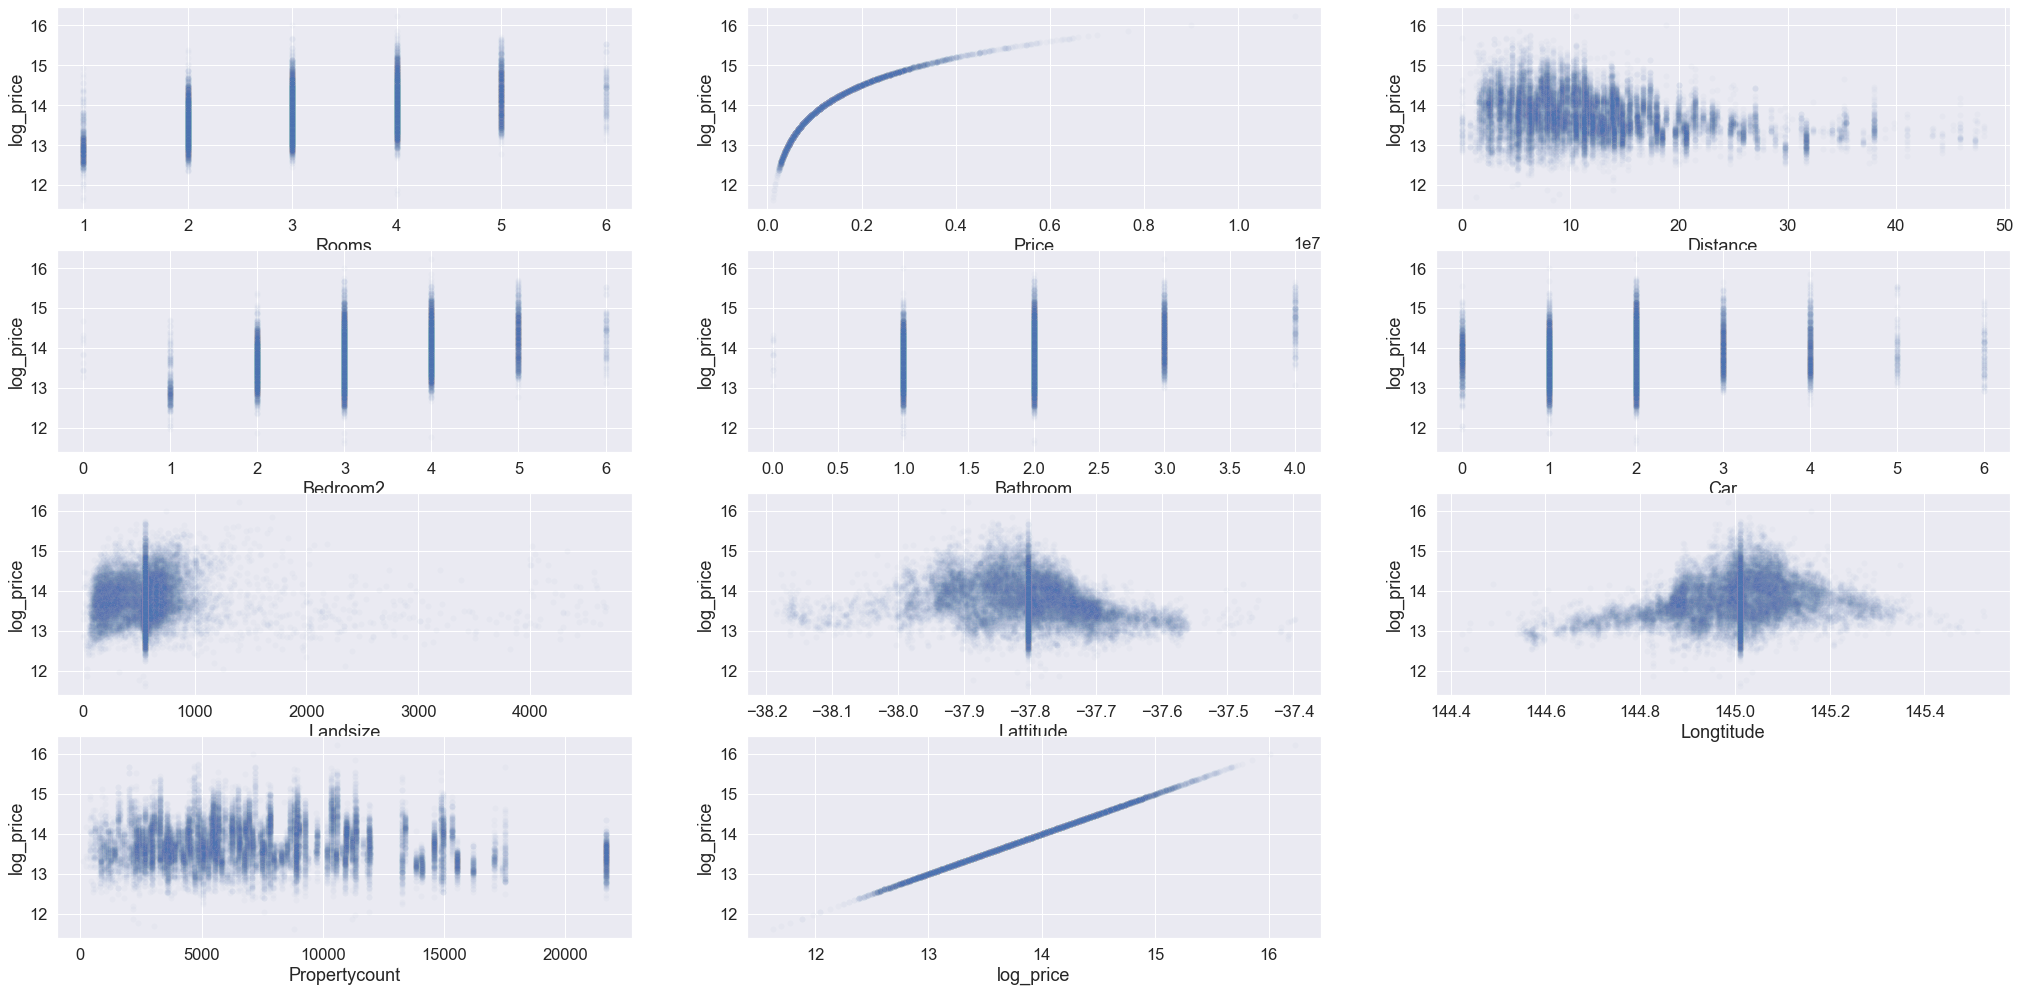

In [46]:
i = 1
plt.figure(figsize =(35, 35))
for col in numerical_features:
    plt.subplot(8,3,i)
    i = i + 1
    sns.scatterplot(data=df1, x=col, y='log_price',alpha=0.03)
    sns.set(font_scale = 1.5)
    ax.set_xlabel(col)
    ax.set_ylabel('log_price')

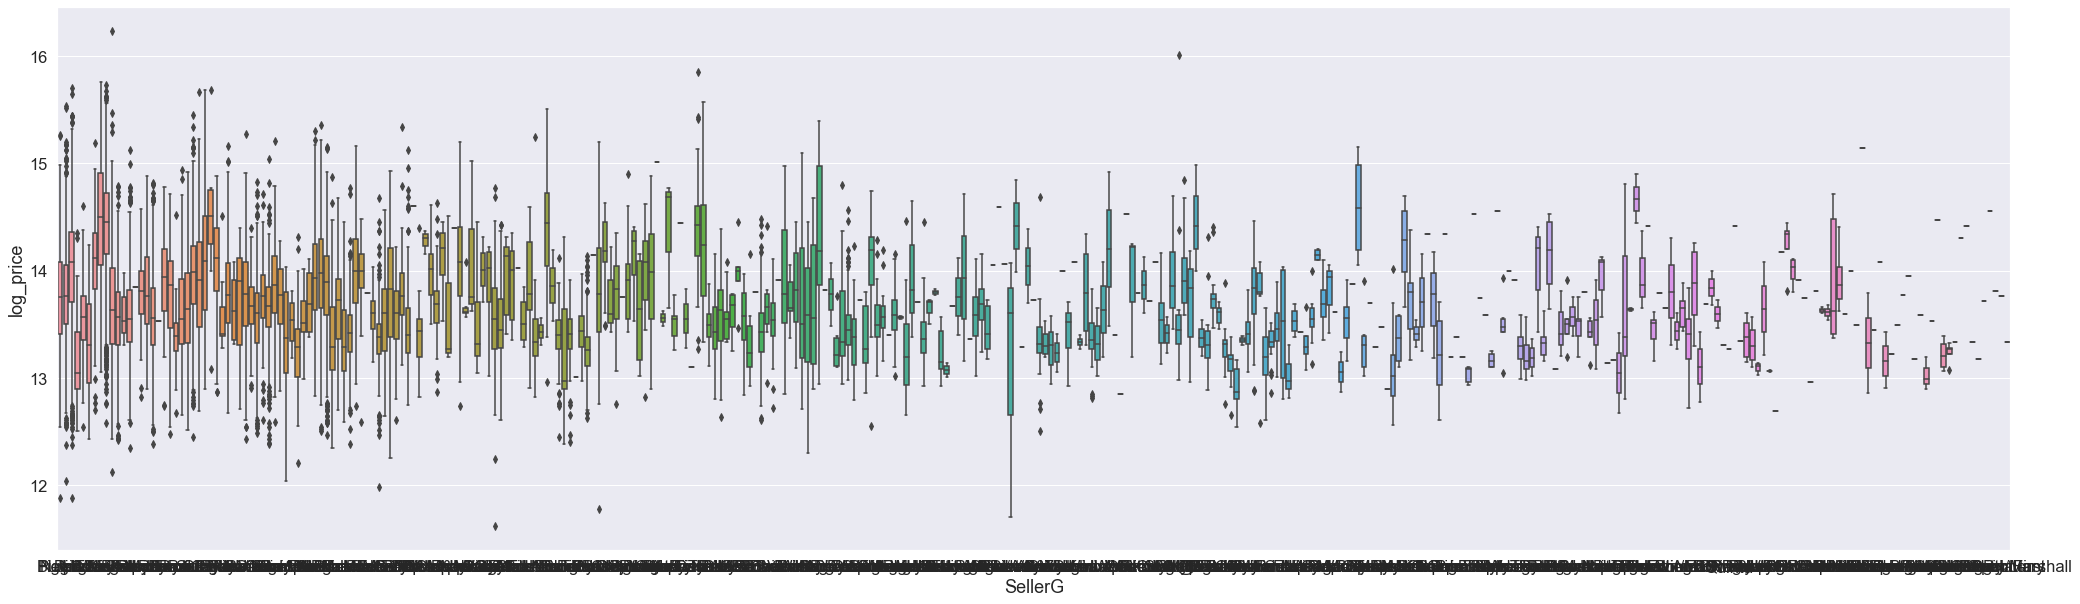

In [47]:
plt.figure(figsize=(35,10))
sns.boxplot(data=df1, x='SellerG', y='log_price')
plt.show()

In [49]:
Mel_data = df1.to_csv('Mel_data')